In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('cervical-cancer_csv.csv')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
import lens
ls = lens.summarise(data)
explorer = lens.explore(ls)
explorer.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
desc,numeric,numeric,numeric,numeric,categorical,numeric,numeric,categorical,numeric,categorical,numeric,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64
notnulls,835,810,828,779,822,822,822,732,732,723,723,735,735,735,735,735,735,735,735,735,735,735,735,735,735,835,71,71,835,835,835,835,835,835,835,835
nulls,0,25,7,56,13,13,13,103,103,112,112,100,100,100,100,100,100,100,100,100,100,100,100,100,100,0,764,764,0,0,0,0,0,0,0,0
unique,44,12,21,11,2,30,62,2,40,2,26,2,5,2,1,2,2,2,2,2,2,1,2,2,2,4,18,18,2,2,2,2,2,2,2,2


In [6]:
categorical = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 
               'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
              'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum',
              'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
               'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
len(categorical)

26

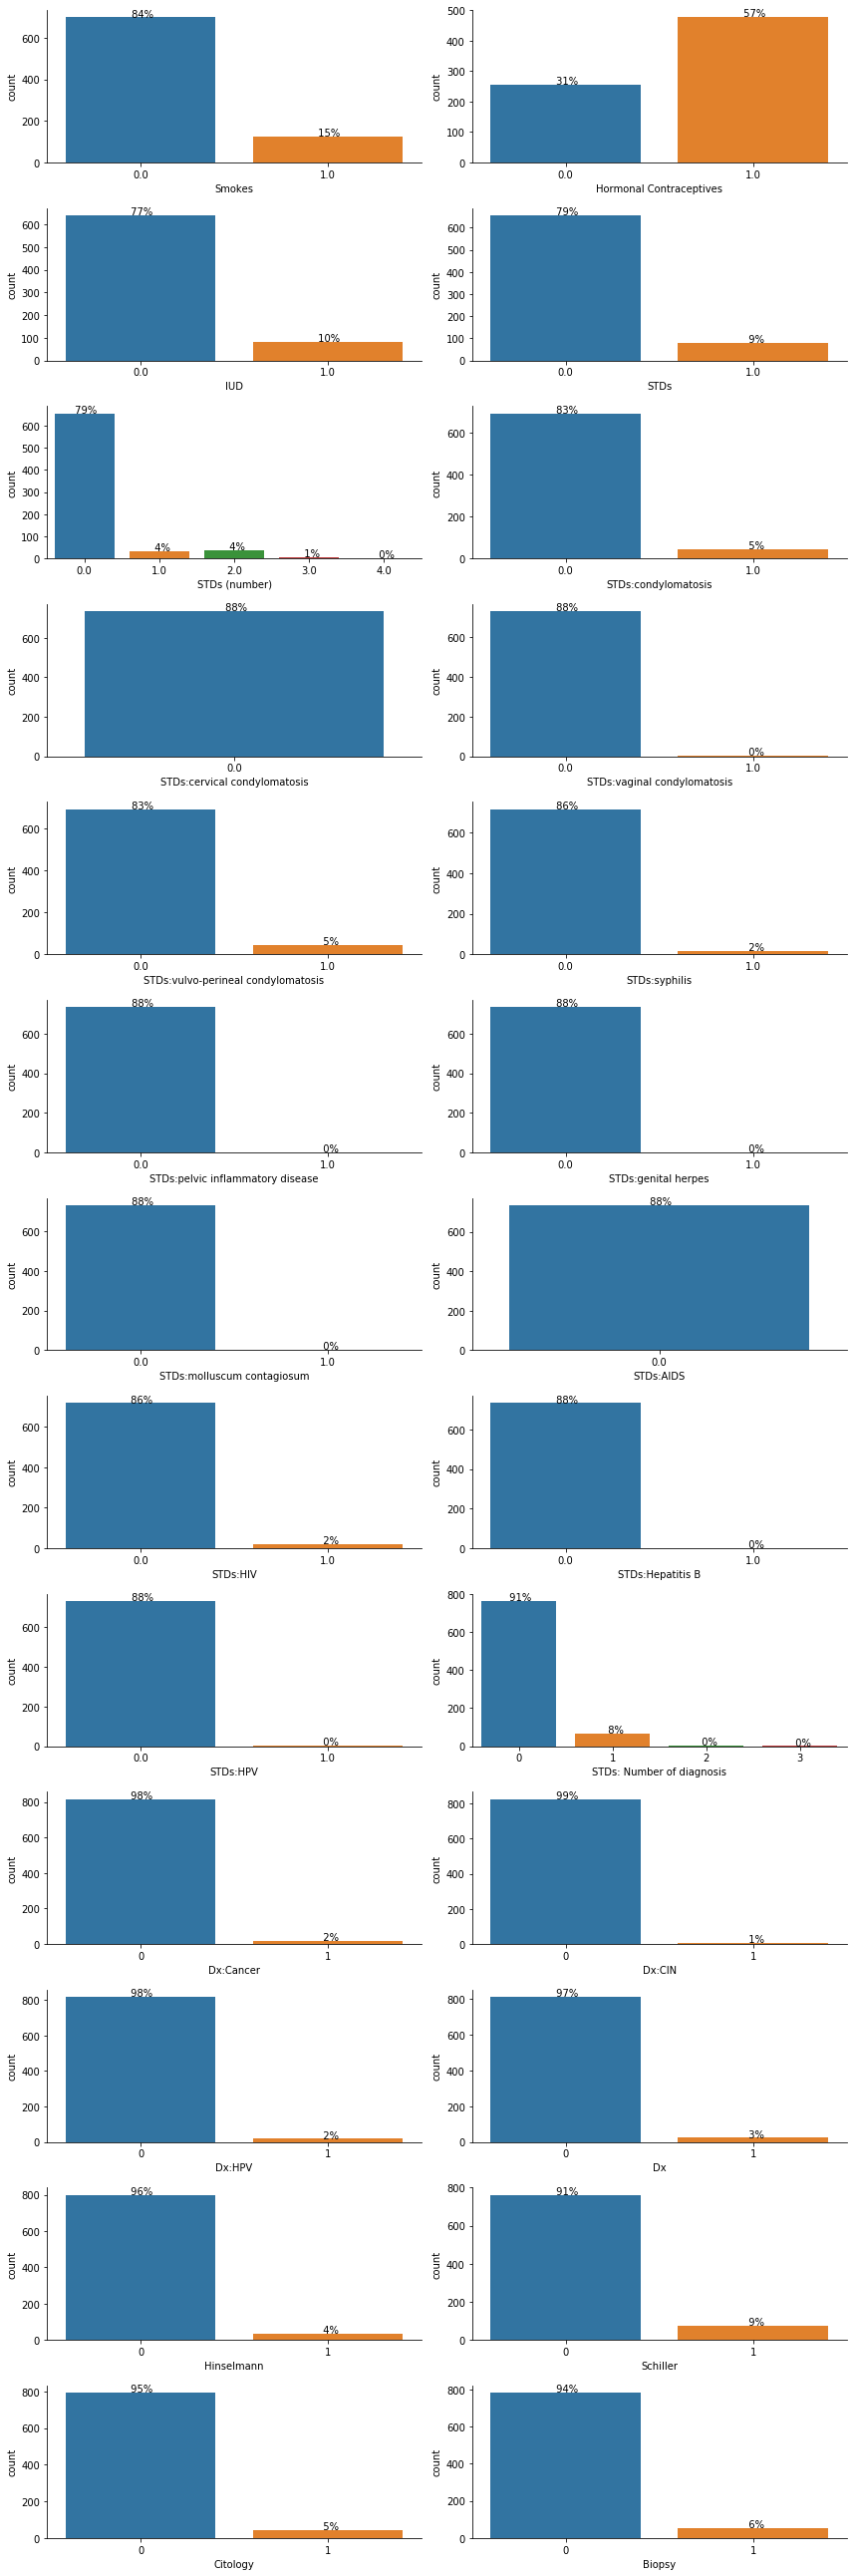

In [16]:
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 36))
axes = axes.flatten()
total = len(data)
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.countplot(x = categorical[idx], data=data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:3.0f}%'.format(100 * height/total),
            ha="center")
sns.despine()
plt.tight_layout()
plt.show()

In [11]:
total

835

### Analiza rozkładu zmiennych kategorycznych

Niektóre zmienne kategoryczne niewiele wnoszą do naszych danych. W momencie, kiedy % występowania pewnej wartości spada poniżej pewnego poziomu, powinniśmy ją usunąć, żeby uniknąć przeuczenia pod kątem tej zmiennej.

Kandydaci do usunięcia po analizie zmiennych kategorycznych:
- Dx:CIN

Kandydaci do dodania dodatkowej kategorii na brak danych (dane ~0 powinny też lądować w tej kategorii):
- STDs:cervical condylomatosis
- STDs:vaginal condylomatosis
- STDs:vulvo-perineal condylomatosis
- STDs:syphilis
- STDs:pelvic inflammatory disease
- STDs:genital herpes
- STDs:molluscum contagiosum
- STDs:AIDS
- STDs:HIV
- STDs:Hepatitis B
- STDs:HPV
- STDs (number)
- STDs: Number of diagnosis

In [23]:
def replaceNA(df, column_name, val):
    df[column_name] = df[column_name].fillna(val)

def replaceInColumn(df, column_name, src, dst):
    df[column_name] = df[column_name].replace(to_replace=src, value=dst)

to_replace = [
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV']

for col in to_replace:
    replaceNA(data, col, 1)
replaceNA(data, 'STDs (number)', -1)
replaceNA(data, 'STDs: Number of diagnosis', -1)
replaceInColumn(data, 'STDs (number)', 4, 3)
replaceInColumn(data, 'STDs: Number of diagnosis', [2,3], 1)

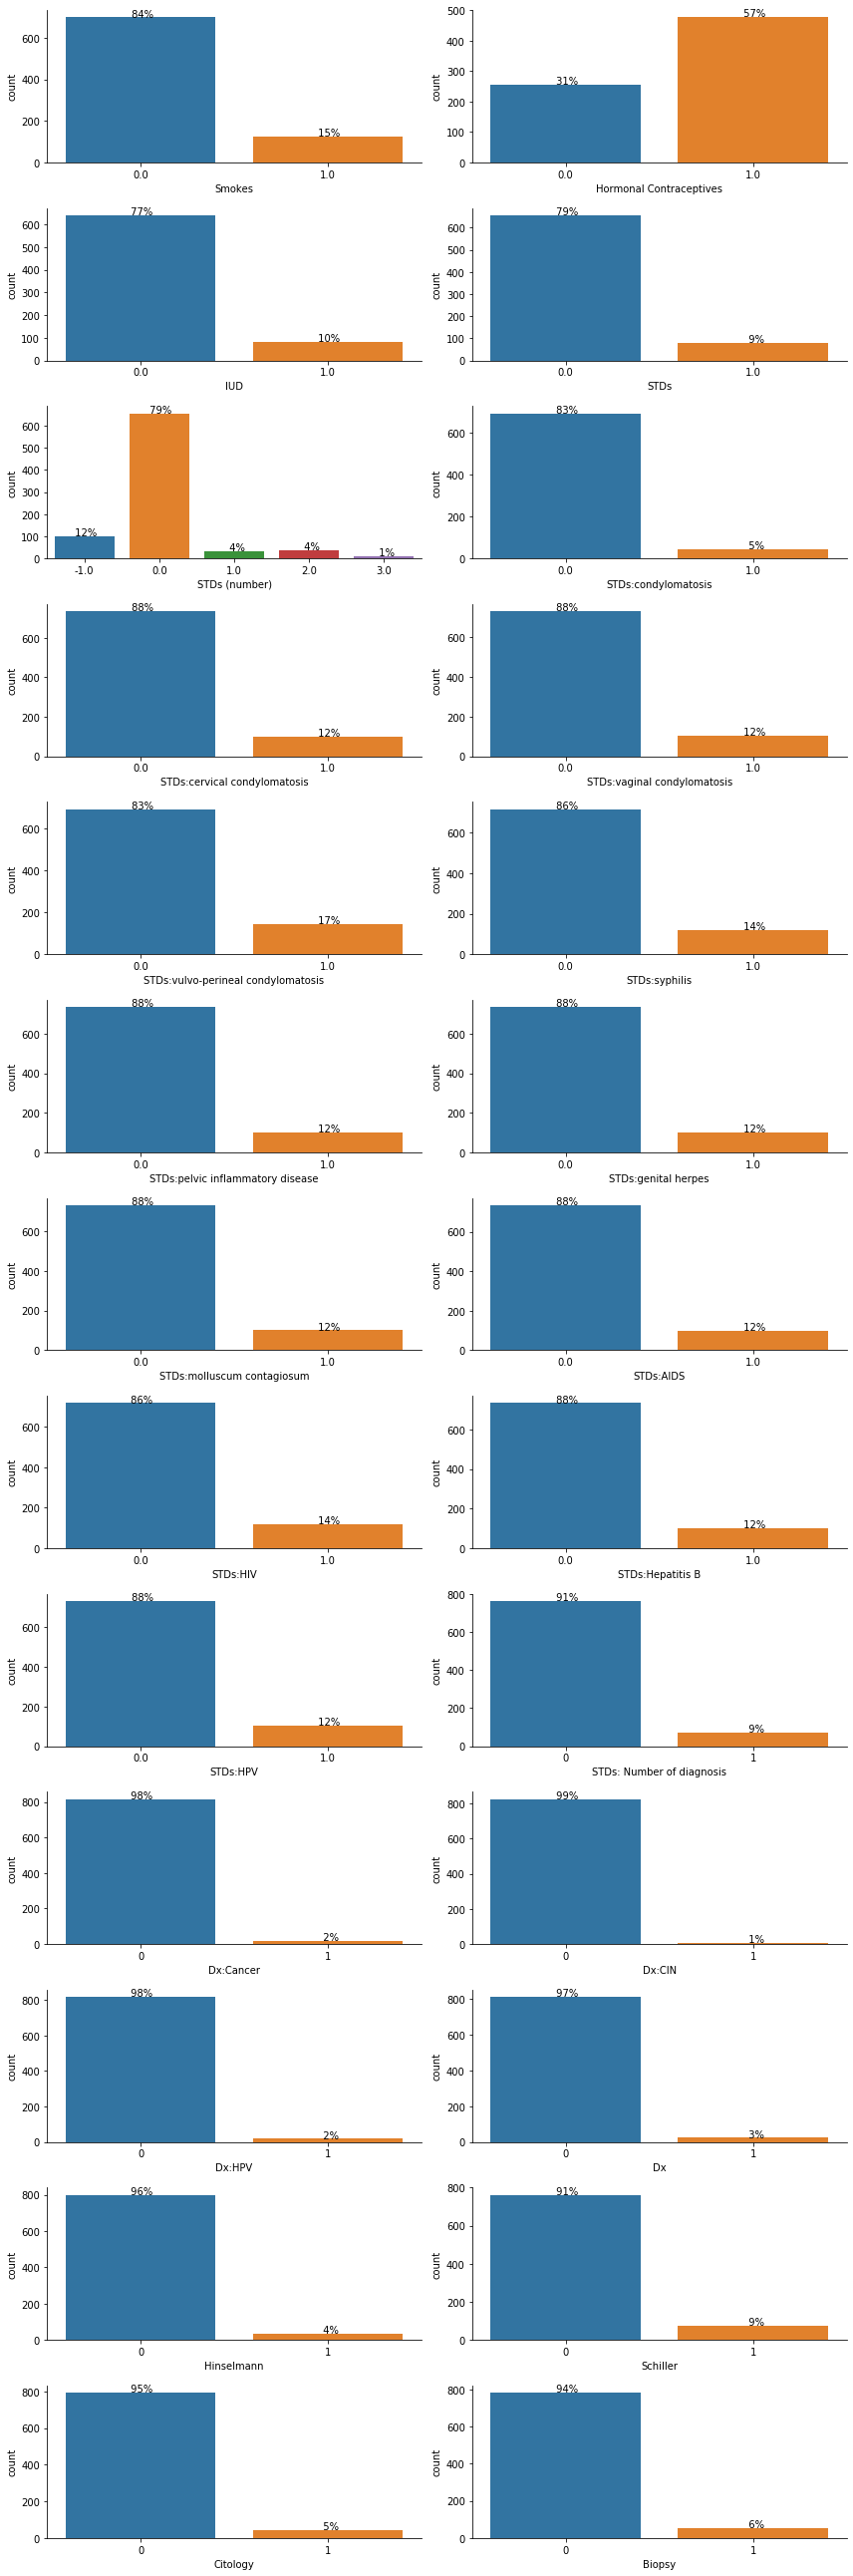

In [24]:
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 36))
axes = axes.flatten()
total = len(data)
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.countplot(x = categorical[idx], data=data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:3.0f}%'.format(100 * height/total),
            ha="center")
sns.despine()
plt.tight_layout()
plt.show()